This notebook explores how to visualise semantic change of a word
See https://github.com/williamleif/histwords/tree/master/viz.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
eb_kg_df = pd.read_json("../eb_kg_hq_with_embeddings_dataframe", orient="index")

In [6]:
abacus_df = eb_kg_df[eb_kg_df["term_name"] == "ABACUS"]

In [7]:
abacus_df

,edition_uri,vol_num,vol_title,genre,print_location,year_published,edition_num,term_uri,note,description,description_uri,summary,term_name,term_type,start_page_num,end_page_num,alter_names,reference_terms,supplements_to,embedding
9611,https://w3id.org/hto/Edition/9929192893804340,1,"First edition, 1773, Volume 1, A-B",encyclopedia,London,1773,1.0,https://w3id.org/hto/ArticleTermRecord/9929192...,None,"Pythagoricus, the multiplication-table, or any...",https://w3id.org/hto/OriginalDescription/99291...,None,ABACUS,Article,16,16,[],[],[],"[-0.0743469, 0.0245197453, -0.0208619069, -0.0..."
13914,https://w3id.org/hto/Edition/9929192893804340,1,"First edition, 1773, Volume 1, A-B",encyclopedia,London,1773,1.0,https://w3id.org/hto/ArticleTermRecord/9929192...,None,is also the name of an ancient instrument for ...,https://w3id.org/hto/OriginalDescription/99291...,None,ABACUS,Article,16,16,[],[],[],"[-0.034765061, -0.0053841686, -0.0454169847, 0..."
15532,https://w3id.org/hto/Edition/9910796273804340,2,"Seventh edition, Volume 2, A-Anatomy",encyclopedia,Edinburgh,1842,7.0,https://w3id.org/hto/ArticleTermRecord/9910796...,None,the son of Jupiter by TEgina. aisle of ensurin...,https://w3id.org/hto/OriginalDescription/99107...,None,ABACUS,Article,179,180,[],[],[],"[0.0334405489, -0.012932162700000001, -0.01002..."
20591,https://w3id.org/hto/Edition/992277653804341,1,"First edition, 1771, Volume 1, A-B",encyclopedia,Edinburgh,1771,1.0,https://w3id.org/hto/ArticleTermRecord/9922776...,None,"a table strewed over with dust or sand, upon w...",https://w3id.org/hto/OriginalDescription/99227...,None,ABACUS,Article,15,15,[],[],[],"[-0.014948871, -0.10341218860000001, -0.022378..."
32345,https://w3id.org/hto/Edition/9910796273804340,0,"Seventh edition, General index",encyclopedia,Edinburgh,1842,7.0,https://w3id.org/hto/ArticleTermRecord/9910796...,None,"in architecture, II. 5; III. 464 and cupboard,...",https://w3id.org/hto/OriginalDescription/99107...,None,ABACUS,Article,13,13,[],[],[],"[-0.0125898598, -0.07773585620000001, -0.01659..."
37454,https://w3id.org/hto/Edition/9922270543804340,1,"Fifth edition, Volume 1, A-AME",encyclopedia,Edinburgh,1815,5.0,https://w3id.org/hto/ArticleTermRecord/9922270...,None,"among the ancient, was a kind of cup Levy, des...",https://w3id.org/hto/OriginalDescription/99222...,None,ABACUS,Article,22,22,[],[],[],"[-0.0227253735, 0.0434677638, -0.0215769354, 0..."
40514,https://w3id.org/hto/Edition/997902543804341,1,"Third edition, Volume 1, A-ANG",encyclopedia,Edinburgh,1797,3.0,https://w3id.org/hto/ArticleTermRecord/9979025...,None,"in architecture, signifies the superior part o...",https://w3id.org/hto/OriginalDescription/99790...,None,ABACUS,Article,30,30,[],[],[],"[-0.0215819459, -0.06715381150000001, -0.05763..."
44432,https://w3id.org/hto/Edition/992277653804341,1,"First edition, 1771, Volume 1, A-B",encyclopedia,Edinburgh,1771,1.0,https://w3id.org/hto/ArticleTermRecord/9922776...,None,"logijlicus, a right-angled triangle, whose sid...",https://w3id.org/hto/OriginalDescription/99227...,None,ABACUS,Article,16,16,[],[],[],"[-0.0018446771000000001, -0.0483793654, -0.009..."
50473,https://w3id.org/hto/Edition/9929192893804340,1,"First edition, 1773, Volume 1, A-B",encyclopedia,London,1773,1.0,https://w3id.org/hto/ArticleTermRecord/9929192...,None,"in architecture, signifies the superior part o...",https://w3id.org/hto/OriginalDescription/99291...,None,ABACUS,Article,15,16,[],[],[],"[-0.0293091834, -0.0968905538, -0.0584455207, ..."
66446,https://w3id.org/hto/Edition/9910796253804340,1,"Sixth edition, Volume 1, A-AME",encyclopedia,Edinburgh,1823,6.0,https://w3id.org/hto/ArticleTermRecord/9910796...,None,the son of Jupiter by iEgina.the isle of J Egi...,https://w3id.org/hto/OriginalDescription/99107...,None,ABACUS,Article,225,226,[],[{'uri': 'https://w3id.org/hto/ArticleTermReco...,[],"[0.052246581800000004, -0.0084810955, 0.007560..."


In [42]:
import re
NON_AZ_REGEXP = re.compile("[^a-z]")

def normalize(word):
    """
    Normalize a word by converting it to lower-case and removing all
    characters that are not 'a',...,'z'.

    :param word: Word to normalize
    :type word: str or unicode
    :return: normalized word
    :rtype word: str or unicode
    """
    return re.sub(NON_AZ_REGEXP, '', word.lower())

In [49]:
def normalize_text(text):
    all_words = text.split()
    all_normalised_words = []
    for word in all_words:
        all_normalised_words.append(normalize(word))
    return ' '.join(all_normalised_words)

In [67]:
from wordcloud import WordCloud


def generate_wordcloud(term_name, year):
    year_terms_df = eb_kg_df[(eb_kg_df["term_name"] == term_name) & (eb_kg_df["year_published"] == year)]
    text = ' '.join(year_terms_df["description"].tolist())
    text = normalize_text(text)
    print(text)
    return WordCloud(max_font_size=50, max_words=40, background_color="white").generate(text)

In [68]:
abacus_1773_wd = generate_wordcloud("ABACUS", 1773)

pythagoricus the multiplicationtable or any table of numbers that facilitates operations in arith is also the name of an ancient instrument for facilitating operations in arithmetic it is variously contrived that chiefly used in europe is made by drawing any number of parallel lines at the distance of two diameters of one of the counters used in the calculation a counter placed on the lowest line fignifics it on the d  on the d  on the th  c in the intermediate spaces the same counters are eliminated at one half of the value of the line immediately superior viz between the list and d  between the d and d   c see plate i fig  a b where the same number  for example is represented under both by different dispositions of the counters in architecture signifies the superior part or member of the capital of a column and serves as a kind of crowning to both it was originally intended to represent a square tile covering a basket the form of the abacus is not the same in all orders in the tuscan

In [45]:
type(abacus_1773_wd)

wordcloud.wordcloud.WordCloud

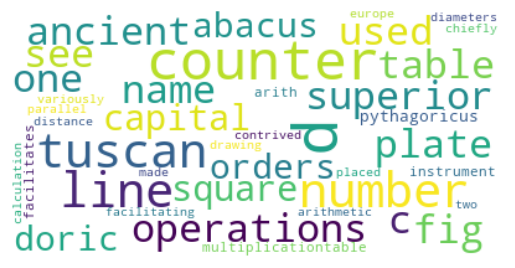

In [69]:
plt.imshow(abacus_1773_wd, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
def frequency_words_from(term_name, year):
    year_terms_df = eb_kg_df[(eb_kg_df["term_name"] == term_name) & (eb_kg_df["year_published"] == year)]
    text = ' '.join(year_terms_df["description"].tolist())
    text = normalize_text(text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word.isalnum()]
    word_frequencies = Counter(words)
    return word_frequencies

In [62]:
wf_abacus_1773 = frequency_words_from("ABACUS", 1773)

In [63]:
wf_abacus_1773

Counter({'counters': 3,
         'tuscan': 3,
         'table': 2,
         'operations': 2,
         'also': 2,
         'name': 2,
         'ancient': 2,
         'used': 2,
         'number': 2,
         'one': 2,
         'line': 2,
         'c': 2,
         'superior': 2,
         'see': 2,
         'plate': 2,
         'fig': 2,
         'capital': 2,
         'square': 2,
         'abacus': 2,
         'orders': 2,
         'doric': 2,
         'pythagoricus': 1,
         'multiplicationtable': 1,
         'numbers': 1,
         'facilitates': 1,
         'arith': 1,
         'instrument': 1,
         'facilitating': 1,
         'arithmetic': 1,
         'variously': 1,
         'contrived': 1,
         'chiefly': 1,
         'europe': 1,
         'made': 1,
         'drawing': 1,
         'parallel': 1,
         'lines': 1,
         'distance': 1,
         'two': 1,
         'diameters': 1,
         'calculation': 1,
         'counter': 1,
         'placed': 1,
         'lowest

In [70]:
wf_abacus_1773_wd = WordCloud(max_font_size=50, max_words=40, background_color ='white').generate_from_frequencies(wf_abacus_1773)

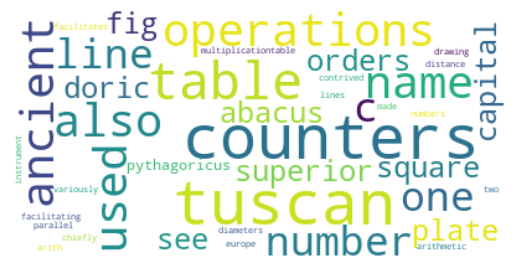

In [71]:
plt.imshow(wf_abacus_1773_wd, interpolation='bilinear')
plt.axis("off")
plt.show()